# Read and Visualize the PERSIANN-CCS


PERSIANN-Cloud Classification System (PERSIANN-CCS) is a real-time global high resolution (0.04° x 0.04° or 4km x 4km;) satellite precipitation product developed by the Center for Hydrometeorology and Remote Sensing (CHRS) at the University of California, Irvine (UCI)



The data can be downloaded here:

https://chrsdata.eng.uci.edu/


------------------------
DTR


# Import packages

In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import xarray as xr

In [5]:
#import dask

In [6]:
import rioxarray

In [7]:
import cartopy

In [8]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [9]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [10]:
import cartopy.io.img_tiles as cimgt

In [11]:
import os

# Working Directory

In [12]:
os.getcwd()

'/media/donald/disk4nvme/GEOSPATIAL_DATA_READ_PROCESS'

## Data

In [13]:
dir_data = '/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/PERSIANN_CCS/CCS_2023-10-13090028am/'
#dir_data

In [14]:
os.listdir(dir_data)

['CCS_1d20200119.tif',
 'CCS_1d20200118.tif',
 'CCS_1d20200117.tif',
 'info.txt',
 'CCS_1d20200120.tif']

list the files

In [15]:
lst_Files = [fl for fl in os.listdir(dir_data) if fl.endswith('.tif') ]
lst_Files

['CCS_1d20200119.tif',
 'CCS_1d20200118.tif',
 'CCS_1d20200117.tif',
 'CCS_1d20200120.tif']

In [16]:
os.path.join(dir_data, lst_Files[0] )

'/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/PERSIANN_CCS/CCS_2023-10-13090028am/CCS_1d20200119.tif'

# File size and memory checks

In [17]:
def convert_bytes(byt_num):
    """
    convert from bytes os.stat(file_path).st_size to KB, MB, GB, TB and PB
    """
    for x in ['bytes', 'KB', 'MB', 'GB', 'TB', 'PB']:
        if byt_num < 1024.0:
            return "%3.1f %s" % (byt_num, x)
        byt_num /= 1024.0
    #return byt_num
        

In [18]:
def check_filesize(file_path):
    """
    function to check the file size
    """
    if os.path.isfile(file_path):
        file_info = os.stat(file_path)#st_size
        return convert_bytes(file_info.st_size)

In [19]:
check_filesize(os.path.join(dir_data, lst_Files[0] ))

'466.2 KB'

# Explore the dataset using Xarray

Often the common choice for reading geotiff files is gdal or rasterio. Here we going to try something different

In [20]:
FILE_NAME = os.path.join(dir_data, lst_Files[1] )
FILE_NAME

'/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/PERSIANN_CCS/CCS_2023-10-13090028am/CCS_1d20200118.tif'

In [21]:
ds_CCS = xr.open_dataset(FILE_NAME, engine="rasterio")

In [22]:
ds_CCS

<xarray.Dataset>
Dimensions:      (band: 1, x: 1138, y: 1063)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 7.06 7.1 7.14 7.18 7.22 ... 52.42 52.46 52.5 52.54
  * y            (y) float64 3.66 3.62 3.58 3.54 ... -38.7 -38.74 -38.78 -38.82
    spatial_ref  int64 ...
Data variables:
    band_data    (band, y, x) float32 ...

In [23]:
# was the georeference read?
ds_CCS.spatial_ref

<xarray.DataArray 'spatial_ref' ()>
[1 values with dtype=int64]
Coordinates:
    spatial_ref  int64 ...
Attributes:
    GeoTransform:  7.039999999999992 0.04 0.0 3.6799999999999997 0.0 -0.04

Geotransform values mean:


    [0] : top left x
    [1] : w-e pixel resolution
    [2] : rotation, 0 if image is "north up"
    [3] : top left y
    [4] : rotation, 0 if image is "north up"
    [5] : n-s pixel resolution

rename the data name "band"

In [24]:
ds_CCS = ds_CCS.rename({'band_data': 'Rain'})

In [25]:
ds_CCS

<xarray.Dataset>
Dimensions:      (band: 1, x: 1138, y: 1063)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 7.06 7.1 7.14 7.18 7.22 ... 52.42 52.46 52.5 52.54
  * y            (y) float64 3.66 3.62 3.58 3.54 ... -38.7 -38.74 -38.78 -38.82
    spatial_ref  int64 ...
Data variables:
    Rain         (band, y, x) float32 ...

quick view

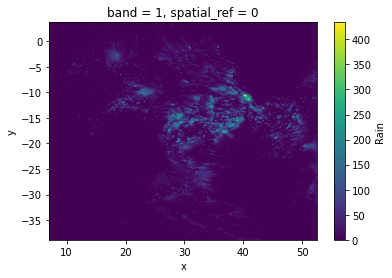

In [26]:
ds_CCS.Rain.plot()

In [27]:
ds_CCS.Rain

<xarray.DataArray 'Rain' (band: 1, y: 1063, x: 1138)>
[1209694 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 7.06 7.1 7.14 7.18 7.22 ... 52.42 52.46 52.5 52.54
  * y            (y) float64 3.66 3.62 3.58 3.54 ... -38.7 -38.74 -38.78 -38.82
    spatial_ref  int64 ...

mask out the zero values

In [28]:
# replace all values equal to -9999 with np.nan
ds_masked = ds_CCS.where(ds_CCS['Rain'] != 0.)  

In [29]:
ds_masked

<xarray.Dataset>
Dimensions:      (band: 1, y: 1063, x: 1138)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 7.06 7.1 7.14 7.18 7.22 ... 52.42 52.46 52.5 52.54
  * y            (y) float64 3.66 3.62 3.58 3.54 ... -38.7 -38.74 -38.78 -38.82
    spatial_ref  int64 0
Data variables:
    Rain         (band, y, x) float32 nan nan nan nan nan ... nan nan nan nan

# Plot the data - Single Image

In [30]:
#stamen_terrain = cimgt.Stamen('terrain-background')

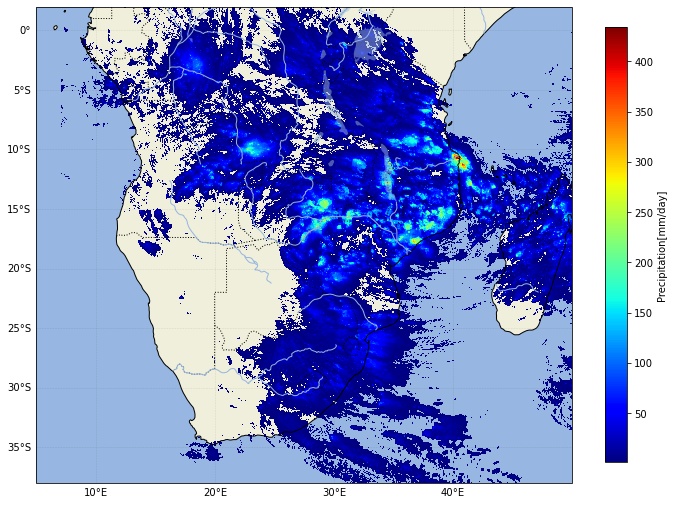

In [31]:
fig = plt.figure()
fig.set_size_inches(12, 10)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
#set_extent(extents, crs=None)[source]
#Set the extent (x0, x1, y0, y1) of the map in the given coordinate system.
#If no crs is given, the extents’ coordinate system will be assumed to be the Geodetic
#version of this axes’ projection.
ax.set_extent([5, 50, -38, 2], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
### add background
#ax.add_image(stamen_terrain, 8)
### add data
ds_masked.Rain.plot(cmap=plt.cm.jet,
                                  cbar_kwargs={"label": "Precipitation[mm/day]", 'shrink':0.8})

#plt.colorbar().set_title('',fontsize=8)

ax.set_title('')
###########
##########
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color="k", alpha=0.1, linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
#gl.ylines = True
#gl.xlines = True

### save fig

fig.savefig('persiann_ccs_2020_jan_18.png', dpi=250)

plt.show()


# Subplot ALL the available data (4 days)

In [32]:
lst_Files  #note the order. If not in the order you expect, you might to sort the list

['CCS_1d20200119.tif',
 'CCS_1d20200118.tif',
 'CCS_1d20200117.tif',
 'CCS_1d20200120.tif']

In [33]:
lst_Files.sort()  # sort list

In [34]:
lst_Files

['CCS_1d20200117.tif',
 'CCS_1d20200118.tif',
 'CCS_1d20200119.tif',
 'CCS_1d20200120.tif']

In [35]:
len(lst_Files)

4

In [ ]:
#stamen_terrain = cimgt.Stamen('terrain-background')

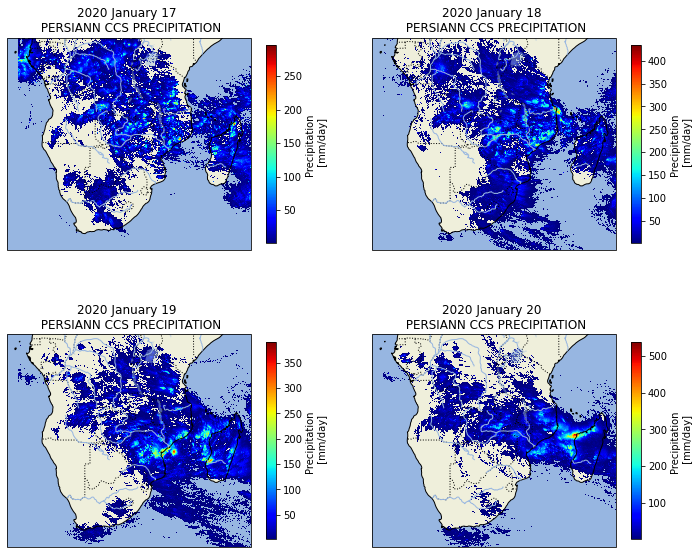

In [36]:

### define subplot rows and columns
nrows=2
ncols=2


# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(12, 10), sharey=True )

# axs is a 2 dimensional array of `GeoAxes`.  We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the models
for sbp, _ in enumerate(axs):
    
    #print('index: ', sbp)
    ###
    #set_extent(extents, crs=None)[source]
    #Set the extent (x0, x1, y0, y1) of the map in the given coordinate system.
    axs[sbp].set_extent([5, 52, -38, 3], crs=ccrs.PlateCarree())

    axs[sbp].add_feature(cfeature.LAND)
    axs[sbp].add_feature(cfeature.OCEAN)
    axs[sbp].add_feature(cfeature.COASTLINE)
    axs[sbp].add_feature(cfeature.BORDERS, linestyle=':')
    axs[sbp].add_feature(cfeature.LAKES, alpha=0.5)
    axs[sbp].add_feature(cfeature.RIVERS)
    
    ### add background
    #axs[sbp].add_image(stamen_terrain, 8)
    
    #### add data
    FILE_NAME_lp = os.path.join(dir_data, lst_Files[sbp] )
    #FILE_NAME
    ds_CCS_lp = xr.open_dataset(FILE_NAME_lp, engine="rasterio")
    ds_CCS_lp = ds_CCS_lp.rename({'band_data': 'Rain'})
    # replace all values equal to -9999 with np.nan
    ds_masked_lp = ds_CCS_lp.where(ds_CCS_lp['Rain'] != 0.) 
    
    ds_masked_lp.Rain.plot(ax= axs[sbp], 
                        cmap=plt.cm.jet,
                        cbar_kwargs={"label": "Precipitation \n [mm/day]", 'shrink':0.8 })
    
    ##get date from filename string
    dt_str = os.path.basename(FILE_NAME_lp).split('_')[1].split('.')[0][2:]
    ##format the string
    #yy[:4]+'-'+yy[4:6]+'-'+yy[6:]  #brute-force
    det_str = pd.to_datetime(dt_str).strftime('%Y %B %d') 
    ### add title to subplot
    axs[sbp].set_title("{} \n PERSIANN CCS PRECIPITATION".format(det_str) )
    
    